# Modelling Non-equilibrium, Brownian Particles Using Python

In [1]:
import numpy as np
import matplotlib.pylab as plt
plt.style.use('seaborn-notebook')
%config InlineBackend.figure_format = 'retina'

## Task 2: Mean Squared Displacement of Biased Random Walks (BRW)

### Base truth
As a base truth, compute the MSD of an ensemble of 1D unbiased random walkers (i.e., Task 2)  


Check the last notebook

### Trajectory of Biased Random Walker

Generate a array of +1 and -1 for with probability $p$ and $q$. Remember that $p + q = 1$. Compute the cumulative sum to find the trajectory of the BRW

In [2]:
n_steps = 10000

In [3]:
p = 0.48
q = 1.0 - p
steps = np.random.choice([1, -1], n_steps, p=[p, q])

In [4]:
traj_single = np.cumsum(steps)


Text(0,0.5,'steps')

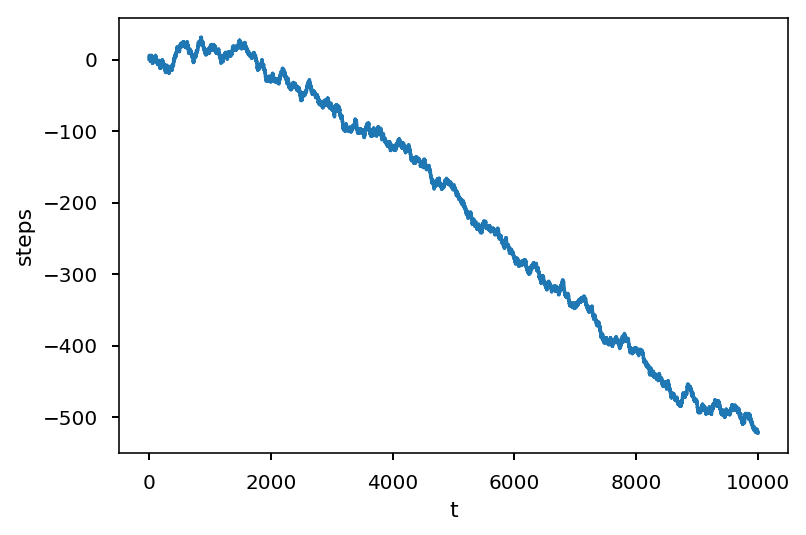

In [5]:
plt.plot(traj_single)
plt.xlabel("t")
plt.ylabel("steps")

### Drift and Mean Squared Displacement of an Ensemble of BRW

Generate several walkers. Find the end points and calculate the average $\left<x\right>$ and MSD $\left<x^2\right>$ of the particles. With this, calculate the drift $u$ and diffusion constant $D$ of the system. Compare with the theoretical prediction.   
Hint: $\left<x\right> = ut$ and $\left<x^2\right> = u^2t^2 + 2Dt$  
Hint: The theoretical values are: $u = t(p-q)\frac{l^2}{\tau}$ and $D = 2pq \frac{l^2}{\tau}$

In [6]:
n_steps = 10000
n_walkers = 10000

In [7]:
p = 0.4
q = 1 - p
steps_ensemble = np.random.choice([1,-1], (n_walkers, n_steps), p=[p, q])

In [8]:
final_ensemble = np.sum(steps_ensemble, axis=1)

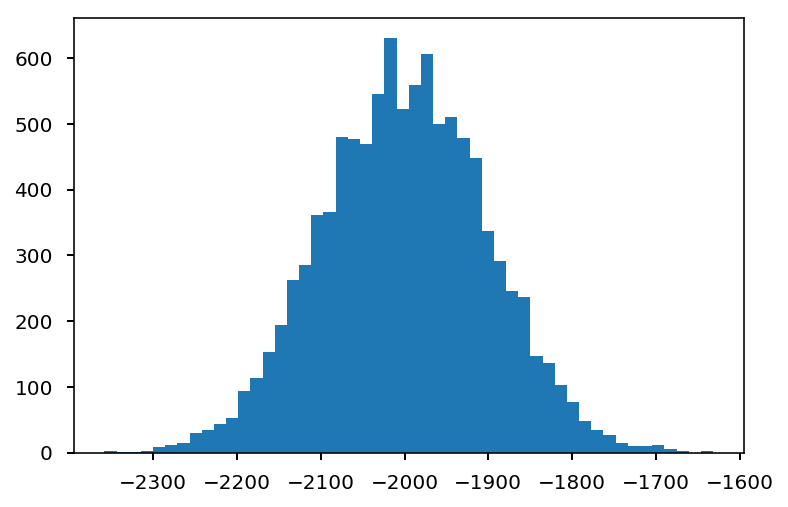

In [9]:
_ = plt.hist(final_ensemble, 50)

In [10]:
x = np.average(final_ensemble)
x_squared = np.average(final_ensemble**2)

In [11]:
u = x/n_steps
D = (x_squared - (u*n_steps)**2)/(2*n_steps)
print("MEASUREMENT: Drift u = {} and diffusion constant D = {}".format(u, D))
print("")
print("THEORY: Drift u = {} and diffusion constant D = {}".format(p-q, 2*p*q))


MEASUREMENT: Drift u = -0.19993486 and diffusion constant D = 0.4879078039019834

THEORY: Drift u = -0.19999999999999996 and diffusion constant D = 0.48
